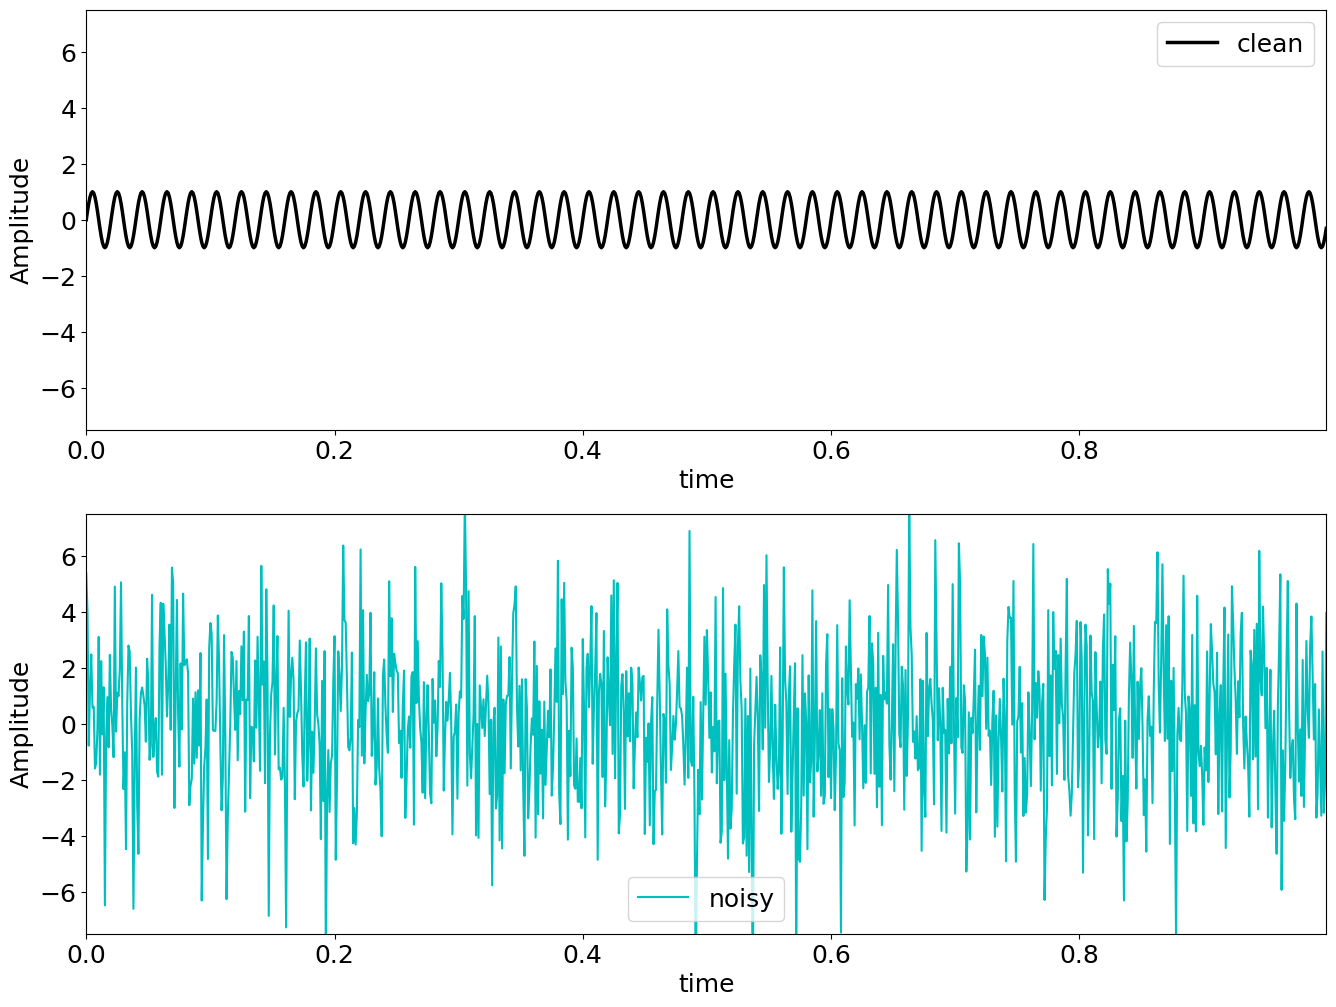

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


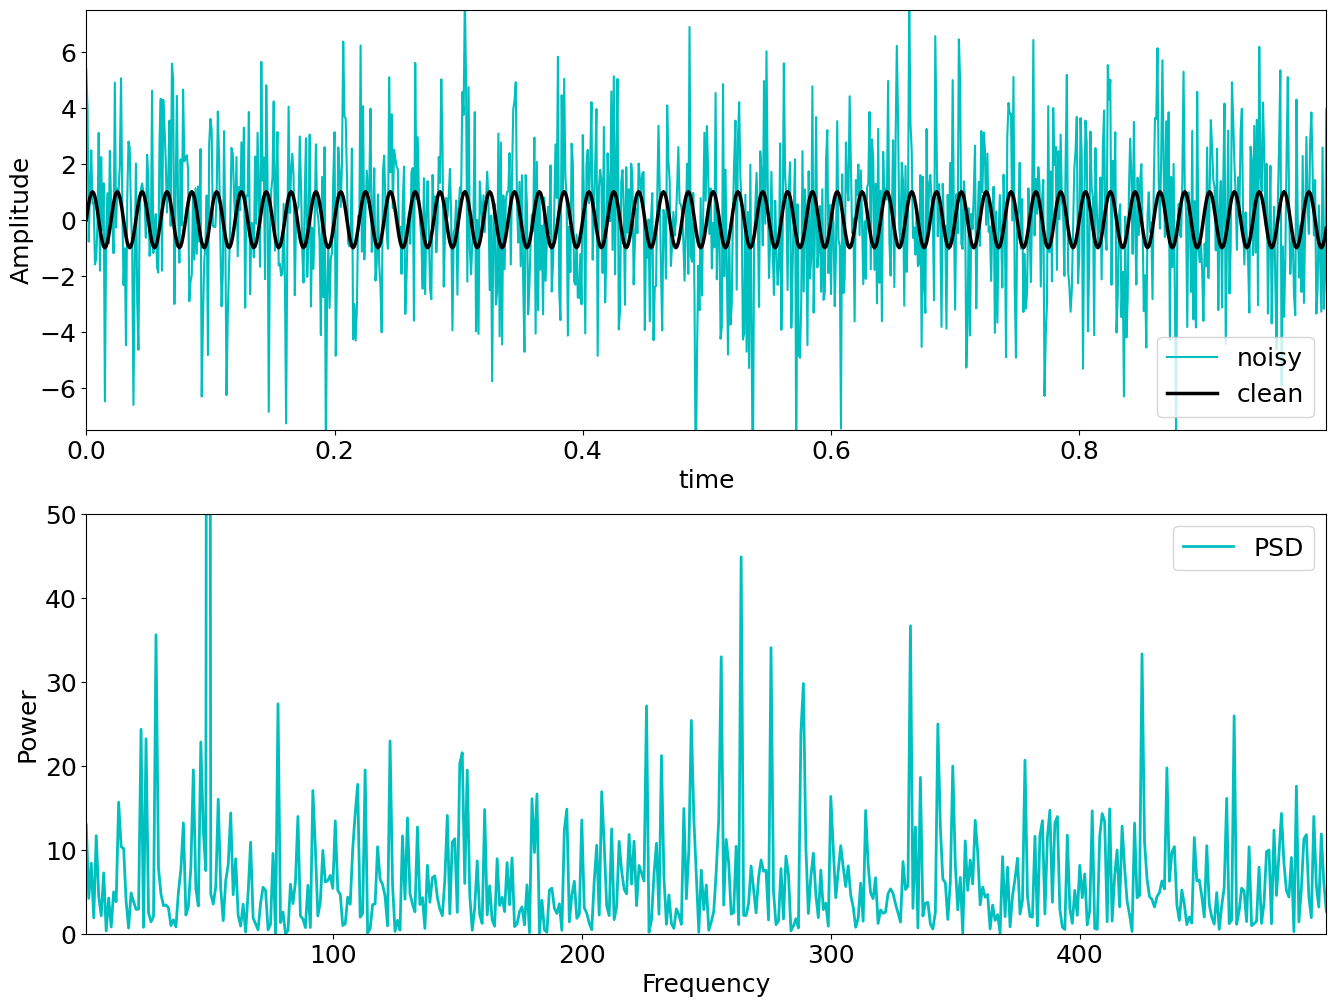

: 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 12]
plt.rcParams.update({"font.size": 18})

dt = 0.001 # jarak Periode sampling 
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, f_clean, color="k", linewidth=2.5, label="clean")
plt.xlim(t[0], t[-1])
plt.ylim(-7.5, 7.5)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.legend()

plt.sca(axs[1])
plt.plot(t, f, color="c", linewidth=1.5, label="noisy")
plt.xlim(t[0], t[-1])
plt.ylim(-7.5, 7.5)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.legend() 

plt.show()

n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype="int")

fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, f, color="c", linewidth=1.5, label="noisy")
plt.plot(t, f_clean, color="k", linewidth=2.5, label="clean")
plt.xlim(t[0], t[-1])
plt.ylim(-7.5, 7.5)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color="c", linewidth=2, label="PSD")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.ylim(0, 50)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.legend() 

plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

# Load the WAV file
try:
    sampling_rate, data = wavfile.read('Before.wav')
except FileNotFoundError:
    print("File not found.")
    exit()
except Exception as e:
    print("An error occurred while reading the file:", e)
    exit()

# Compute the FFT
fft_data = np.fft.fft(data)

# Compute the frequency bins
frequency_bins = np.fft.fftfreq(len(data), 1 / sampling_rate)

# Visualize the original sound
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(data)
plt.title('Original Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Apply the filter in the frequency domain
# Here, we'll remove frequencies above a certain threshold
threshold = 5000
filtered_data = fft_data.copy()
filtered_data[np.abs(frequency_bins) > threshold] = 0

# Compute the inverse FFT
filtered_data = np.fft.ifft(filtered_data).real

# Visualize the filtered sound
plt.subplot(1, 2, 2)
plt.plot(filtered_data)
plt.title('Filtered Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Save the filtered sound to a new WAV file
wavfile.write('filtered_output.wav', sampling_rate, filtered_data.astype(np.int16))

# Display the plots
plt.tight_layout()
plt.show()


File not found.


NameError: name 'data' is not defined

: 

C:\Users\rizky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
C:\Users\rizky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\rizky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\noisereduce\noisereduce.py:306: RuntimeWarning: invalid value encountered in divide
  sig_mult_above_thresh = (abs_sig_stft - sig_stft_smooth) / sig_stft_smooth


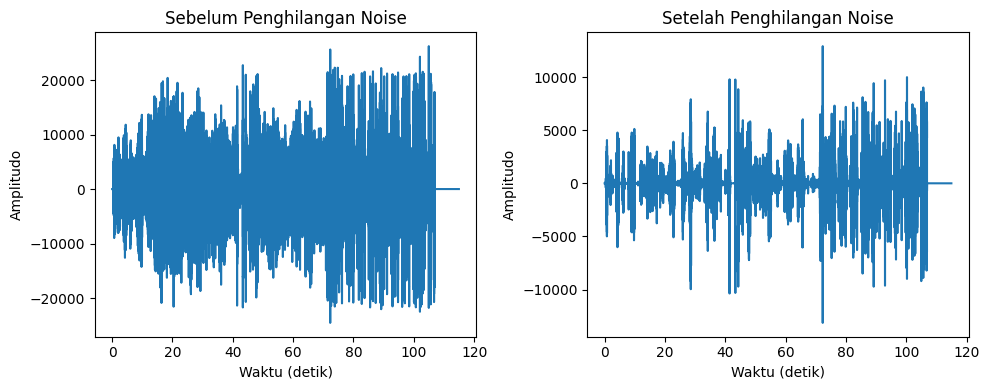

In [2]:
from pydub import AudioSegment
import noisereduce as nr
import matplotlib.pyplot as plt
import numpy as np

# Baca file MP3
# audio = AudioSegment.from_file("pantai.mp3", format="mp3")
audio = AudioSegment.from_file("output2.wav", format="wav")

# Konversi ke format WAV
audio.export("output.wav", format="wav")

# Menghilangkan noise dari file WAV
noisy_part = audio.get_array_of_samples()
reduced_noise = nr.reduce_noise(y=noisy_part, sr=audio.frame_rate)

# Mengambil sinyal suara sebelum penghilangan noise
samples = np.array(noisy_part)
time = np.arange(0, len(samples)) / audio.frame_rate

# Menampilkan sinyal sebelum penghilangan noise
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time, samples)
plt.title('Sebelum Penghilangan Noise')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

# Mengambil sinyal suara setelah penghilangan noise
processed_samples = np.array(reduced_noise)
processed_time = np.arange(0, len(processed_samples)) / audio.frame_rate

# Menampilkan sinyal setelah penghilangan noise
plt.subplot(1, 2, 2)
plt.plot(processed_time, processed_samples)
plt.title('Setelah Penghilangan Noise')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()



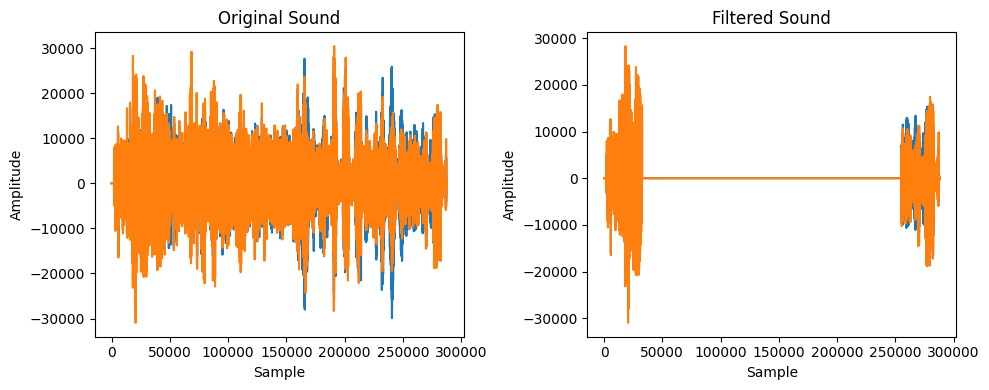

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

# Load the WAV file
try:
    sampling_rate, data = wavfile .read('Before.wav')
except FileNotFoundError:
    print("File not found.")
    exit()
except Exception as e:
    print("An error occurred while reading the file:", e)
    exit()

# Compute the FFT
fft_data = np.fft.fft(data)

# Compute the frequency bins
frequency_bins = np.fft.fftfreq(len(data), 1 / sampling_rate)

# Visualize the original sound
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(data)
plt.title('Original Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Apply the filter in the frequency domain
# Here, we'll remove frequencies above a certain threshold
threshold = 5000  # Adjust this value to control the filtering
filtered_data = fft_data.copy()
filtered_data[np.abs(frequency_bins) > threshold] = 0

# Compute the inverse FFT
filtered_data = np.fft.ifft(filtered_data).real

# Visualize the filtered sound
plt.subplot(1, 2, 2)
plt.plot(filtered_data)
plt.title('Filtered Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Save the filtered sound to a new WAV file
wavfile.write('After.wav', sampling_rate, filtered_data.astype(np.int16))

# Display the plots
plt.tight_layout()
plt.show()



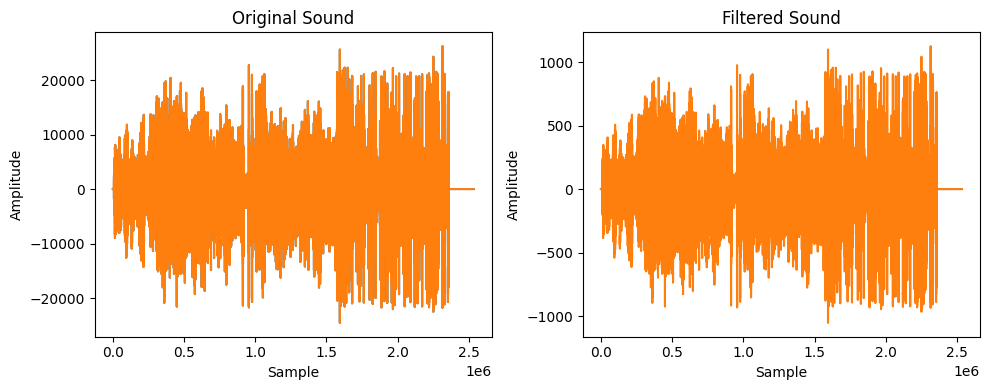

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy import signal

# Load the WAV file
try:
    sampling_rate, data = wavfile.read('output2.wav')
except FileNotFoundError:
    print("File not found.")
    exit()
except Exception as e:
    print("An error occurred while reading the file:", e)
    exit()

# Apply a noise reduction filter
# Here, we'll use a Butterworth bandpass filter
cutoff_low = 300  # Lower cutoff frequency (in Hz)
cutoff_high = 5000  # Upper cutoff frequency (in Hz)
order = 4  # Filter order

b, a = signal.butter(order, [cutoff_low, cutoff_high], fs=sampling_rate, btype='band')
filtered_data = signal.lfilter(b, a, data)

# Visualize the original sound
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(data)
plt.title('Original Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Visualize the filtered sound
plt.subplot(1, 2, 2)
plt.plot(filtered_data)
plt.title('Filtered Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Save the filtered sound to a new WAV file
wavfile.write('Kefilter.wav', sampling_rate, filtered_data.astype(np.int16))

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy import signal

# Load the WAV file
try:
    sampling_rate, data = wavfile.read('Before.wav')
except FileNotFoundError:
    print("File not found.")
    exit()
except Exception as e:
    print("An error occurred while reading the file:", e)
    exit()

# Apply the inverse filter
# Here, we'll use a Butterworth highpass filter
cutoff_frequency = 5000  # Cutoff frequency (in Hz)
order = 4  # Filter order

b, a = signal.butter(order, cutoff_frequency, fs=sampling_rate, btype='high')
filtered_data = signal.lfilter(b, a, data)

# Visualize the original sound
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(data)
plt.title('Original Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Visualize the filtered sound
plt.subplot(1, 2, 2)
plt.plot(filtered_data)
plt.title('Filtered Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Save the filtered sound to a new WAV file
wavfile.write('filtered.wav', sampling_rate, filtered_data.astype(np.int16))

# Display the plots
plt.tight_layout()
plt.show()
